In [1]:
from keras.models import load_model
from keras.models import model_from_json
import cv2 
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import glob
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

In [ ]:
def liff(folder,m,n):
    images = []
    for i in range(len(folder)):
        img = cv2.imread(folder[i])
        img= cv2.resize(img,(m,n), interpolation = cv2.INTER_AREA)
        img=np.array(255*(img / 255) ** 2, dtype = 'uint8')
        images.append(img)
    images=np.array(images)
    
    return images

In [ ]:

json_file = open('model_32*32.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights('model_32*32.h5')

In [ ]:

json_file1 = open('model_64*64.json', 'r')
loaded_model_json1 = json_file1.read()
json_file1.close()
loaded_model1 = model_from_json(loaded_model_json1)

loaded_model1.load_weights('model_64*64.h5')

In [ ]:

json_file2 = open('model_96*96.json', 'r')
loaded_model_json2 = json_file2.read()
json_file2.close()
loaded_model2 = model_from_json(loaded_model_json2)

loaded_model2.load_weights('model_96*96.h5')

In [ ]:

json_file3 = open('model_128*128.json', 'r')
loaded_model_json3 = json_file3.read()
json_file3.close()
loaded_model3 = model_from_json(loaded_model_json3)

loaded_model3.load_weights('model_128*128.h5')

In [ ]:
json_file4 = open('model_160*160.json', 'r')
loaded_model_json4 = json_file4.read()
json_file4.close()
loaded_model4 = model_from_json(loaded_model_json4)

loaded_model4.load_weights('model_160*160.h5')

In [ ]:

json_file5 = open('model_192*192.json', 'r')
loaded_model_json5 = json_file5.read()
json_file5.close()
loaded_model5 = model_from_json(loaded_model_json5)
loaded_model5.load_weights('model_192*192.h5')

In [ ]:
folder_positive=glob.glob('/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Training/House/*.jpeg')
folder_positive.extend(glob.glob('/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Training/House/*.jpg'))
folder_negative=glob.glob('/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Training/Not_House/*.jpg')
folder_positive.extend(glob.glob('/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Training/House/*.png'))

In [ ]:
positive_img=liff(folder_positive,32,32)
negative_img=liff(folder_negative,32,32)

In [ ]:
positive_img1=liff(folder_positive,64,64)
negative_img1=liff(folder_negative,64,64)

In [ ]:
positive_img2=liff(folder_positive,96,96)
negative_img2=liff(folder_negative,96,96)

In [ ]:
positive_img3=liff(folder_positive,128,128)
negative_img3=liff(folder_negative,128,128)

In [ ]:
positive_img4=liff(folder_positive,160,160)
negative_img4=liff(folder_negative,160,160)

In [ ]:
positive_img5=liff(folder_positive,192,192)
negative_img5=liff(folder_negative,192,192)

In [ ]:
img=np.concatenate([positive_img,negative_img])
img1=np.concatenate([positive_img1,negative_img1])
img2=np.concatenate([positive_img2,negative_img2])
img3=np.concatenate([positive_img3,negative_img3])
img4=np.concatenate([positive_img4,negative_img4])
img5=np.concatenate([positive_img5,negative_img5])

(array([2708021., 1615701., 1494064., 1371172., 1358321., 1302668.,
        1188651.,  996248.,  629098.,  471928.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

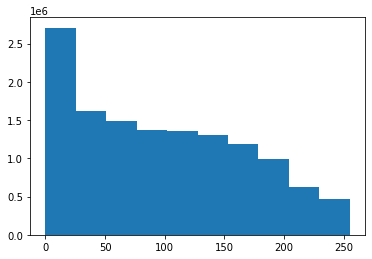

In [ ]:
plt.hist(positive_img1.ravel())

(array([5596460., 1978786., 1408723., 1015390.,  819351.,  644592.,
         519751.,  435042.,  346704.,  567681.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

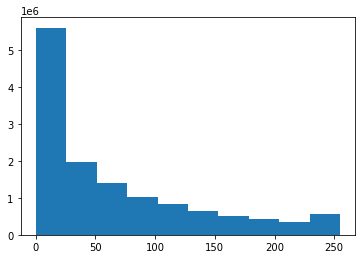

In [ ]:
plt.hist(negative_img1.ravel())

In [ ]:
pos_tar=[1]*(len(positive_img))
neg_tar=[0]*(len(negative_img))
target=np.concatenate([pos_tar,neg_tar])

In [ ]:
model=[loaded_model,loaded_model1,loaded_model2,loaded_model3,loaded_model4,loaded_model5]
image=[img,img1,img2,img3,img4,img5]

In [ ]:
pred=[]
for i in range(len(model)):
    pred.append(model[i].predict(image[i]))

In [ ]:
def convert(p_t):
    temp=[]
    for i in range(len(p_t)):
        temp.append(p_t[i][0])
    p_t=temp
    for i in range(len(p_t)):
        if p_t[i]<0.5:
            p_t[i]=0
        else:
            p_t[i]=1
    return p_t

In [ ]:
for i in range(len(pred)):
    pred[i]=convert(pred[i])

In [ ]:
df=pd.DataFrame()
df['target']=target
df['32']=pred[0]
df['64']=pred[1]
df['96']=pred[2]
df['128']=pred[3]
df['160']=pred[4]
df['192']=pred[5]

In [ ]:
df['folder']=np.concatenate([folder_positive,folder_negative])

<AxesSubplot:>

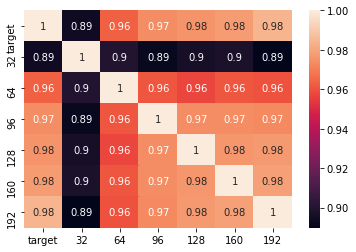

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df

,target,32,64,96,128,160,192,folder
0,1,1,1,1,1,1,1,/home/srikanth/Downloads/drive-download-202101...
1,1,1,1,1,1,1,1,/home/srikanth/Downloads/drive-download-202101...
2,1,1,1,1,1,1,1,/home/srikanth/Downloads/drive-download-202101...
3,1,1,1,1,1,1,1,/home/srikanth/Downloads/drive-download-202101...
4,1,1,1,1,1,1,1,/home/srikanth/Downloads/drive-download-202101...
...,...,...,...,...,...,...,...,...
2149,0,0,0,0,0,0,0,/home/srikanth/Downloads/drive-download-202101...
2150,0,0,0,0,0,0,0,/home/srikanth/Downloads/drive-download-202101...
2151,0,0,0,0,0,0,0,/home/srikanth/Downloads/drive-download-202101...
2152,0,0,0,0,0,0,0,/home/srikanth/Downloads/drive-download-202101...


In [ ]:
acc=[]
for i in range(len(pred)):
    acc.append(accuracy_score(pred[i],target)*100)

In [ ]:
def prin_conf(conf_matrix):
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    conf_sensitivity = (TP / float(TP + FN))
    conf_specificity = (TN / float(TN + FP))
    return conf_sensitivity*100,conf_specificity*100

In [ ]:
sens=[]
spec=[]
for i in range(len(pred)):
    s,sp=prin_conf(confusion_matrix(pred[i],target))
    sens.append(s)
    spec.append(sp)

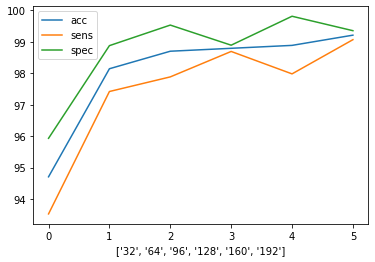

In [ ]:
plt.plot(acc)
plt.plot(sens)
plt.plot(spec)
plt.xlabel(['32','64','96','128','160','192'])
plt.legend(['acc','sens','spec'])

In [ ]:
f=glob.glob('/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Testing/house/*.jpeg')
f.extend(glob.glob('/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Testing/house/*.jpg'))
f.extend(glob.glob('/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Testing/house/*.png'))
f1=glob.glob('/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Testing/not_house/*.jpeg')
f1.extend(glob.glob('/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Testing/not_house/*.jpg'))
f1.extend(glob.glob('/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Testing/not_house/*.png'))

In [ ]:
positive_img=liff(f,32,32)
negative_img=liff(f1,32,32)

In [ ]:
positive_img1=liff(f,64,64)
negative_img1=liff(f1,64,64)

In [ ]:
positive_img2=liff(f,96,96)
negative_img2=liff(f1,96,96)

In [ ]:
positive_img3=liff(f,128,128)
negative_img3=liff(f1,128,128)

In [ ]:
positive_img4=liff(f,160,160)
negative_img4=liff(f1,160,160)

In [ ]:
positive_img5=liff(f,192,192)
negative_img5=liff(f1,192,192)

In [ ]:
img=np.concatenate([positive_img,negative_img])
img1=np.concatenate([positive_img1,negative_img1])
img2=np.concatenate([positive_img2,negative_img2])
img3=np.concatenate([positive_img3,negative_img3])
img4=np.concatenate([positive_img4,negative_img4])
img5=np.concatenate([positive_img5,negative_img5])

In [ ]:
pos_tar=[1]*(len(positive_img))
neg_tar=[0]*(len(negative_img))
target1=np.concatenate([pos_tar,neg_tar])

In [ ]:
model=[loaded_model,loaded_model1,loaded_model2,loaded_model3,loaded_model4,loaded_model5]
image=[img,img1,img2,img3,img4,img5]

In [ ]:
pred1=[]
for i in range(len(model)):
    pred1.append(model[i].predict(image[i]))

In [ ]:
for i in range(len(pred1)):
    pred1[i]=convert(pred1[i])

In [ ]:
df1=pd.DataFrame()
df1['target']=target1
df1['32']=pred1[0]
df1['64']=pred1[1]
df1['96']=pred1[2]
df1['128']=pred1[3]
df1['160']=pred1[4]
df1['192']=pred1[5]
df1['folder']=np.concatenate([f,f1])

In [ ]:
df

,target,32,64,96,128,160,192,folder
0,1,1,1,1,1,1,1,/home/srikanth/Downloads/drive-download-202101...
1,1,1,1,1,1,1,1,/home/srikanth/Downloads/drive-download-202101...
2,1,1,1,1,1,1,1,/home/srikanth/Downloads/drive-download-202101...
3,1,1,1,1,1,1,1,/home/srikanth/Downloads/drive-download-202101...
4,1,1,1,1,1,1,1,/home/srikanth/Downloads/drive-download-202101...
...,...,...,...,...,...,...,...,...
2149,0,0,0,0,0,0,0,/home/srikanth/Downloads/drive-download-202101...
2150,0,0,0,0,0,0,0,/home/srikanth/Downloads/drive-download-202101...
2151,0,0,0,0,0,0,0,/home/srikanth/Downloads/drive-download-202101...
2152,0,0,0,0,0,0,0,/home/srikanth/Downloads/drive-download-202101...


<AxesSubplot:>

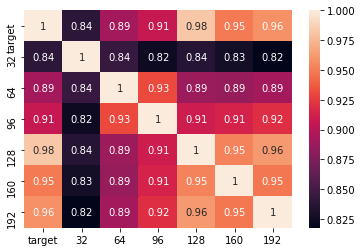

In [ ]:
sns.heatmap(df1.corr(),annot=True)

In [ ]:
acc1=[]
for i in range(len(pred1)):
    acc1.append(accuracy_score(pred1[i],target1)*100)

In [ ]:
sens1=[]
spec1=[]
for i in range(len(pred)):
    s,sp=prin_conf(confusion_matrix(pred1[i],target1))
    sens1.append(s)
    spec1.append(sp)

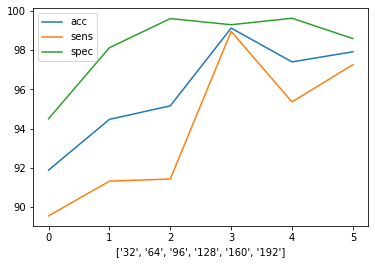

In [ ]:
plt.plot(acc1)
plt.plot(sens1)
plt.plot(spec1)
plt.xlabel(['32','64','96','128','160','192'])
plt.legend(['acc','sens','spec'])

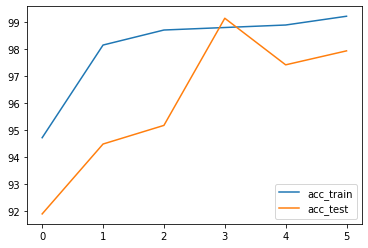

In [ ]:
plt.plot(acc)

plt.plot(acc1)

plt.legend(['acc_train','acc_test'])

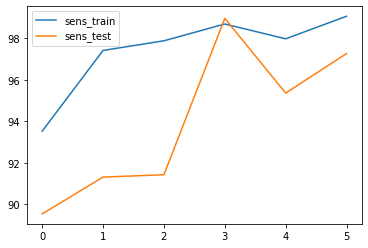

In [ ]:
plt.plot(sens)

plt.plot(sens1)

plt.legend(['sens_train','sens_test'])

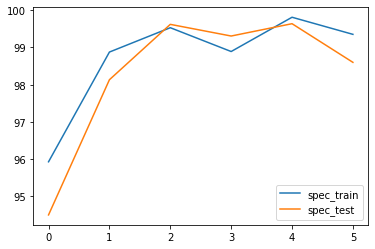

In [ ]:
plt.plot(spec)

plt.plot(spec1)

plt.legend(['spec_train','spec_test'])

In [ ]:
tar=[]

for i in range(len(pred[0])):
    tar1=[]

    tar1.append(pred[0][i])
    tar1.append((pred[0][i]|pred[1][i]))
    tar1.append((pred[0][i]&pred[1][i])|(pred[0][i]&pred[2][i])|(pred[1][i]&pred[2][i]))
    tar1.append((pred[0][i]&pred[1][i]&pred[2][i])&(pred[3][i]))
    tar1.append((pred[0][i]&pred[1][i]&pred[2][i])&(pred[3][i]&pred[4][i]))
    tar1.append((pred[0][i]&pred[1][i]&pred[2][i])&(pred[3][i]&pred[4][i]|pred[5][i]))
    tar.append(tar1)
        


In [ ]:
tar2=[]

for i in range(len(pred1[0])):
    tar1=[]


    tar1.append(pred1[0][i])
    tar1.append((pred1[0][i]|pred1[1][i]))
    tar1.append((pred1[0][i]&pred1[1][i])|(pred1[0][i]&pred1[2][i])|(pred1[1][i]&pred1[2][i]))
    tar1.append((pred1[0][i]&pred1[1][i]&pred1[2][i])&(pred1[3][i]))
    tar1.append((pred1[0][i]&pred1[1][i]&pred1[2][i])&(pred1[3][i]&pred1[4][i]))
    tar1.append((pred1[0][i]&pred1[1][i]&pred1[2][i])&(pred1[3][i]&pred1[4][i]|pred1[5][i]))
    tar2.append(tar1)


In [ ]:
tar=pd.DataFrame(tar)

In [ ]:
tar2=pd.DataFrame(tar2)

In [ ]:
acc2=[]
sens2=[]
spec2=[]
for i in range(6):
    acc2.append(accuracy_score(tar.iloc[:,i],target)*100)
    s,sp=prin_conf(confusion_matrix(tar.iloc[:,i],target))
    sens2.append(s)
    spec2.append(sp)

In [ ]:
acc3=[]
sens3=[]
spec3=[]
for i in range(6):
    acc3.append(accuracy_score(tar2.iloc[:,i],target1)*100)
    s,sp=prin_conf(confusion_matrix(tar2.iloc[:,i],target1))
    sens3.append(s)
    spec3.append(sp)

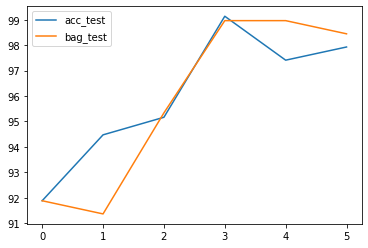

In [ ]:
plt.plot(acc1)

plt.plot(acc3)

plt.legend(['acc_test','bag_test'])

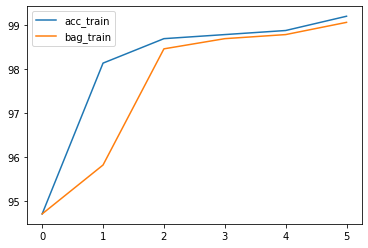

In [ ]:
plt.plot(acc)

plt.plot(acc2)

plt.legend(['acc_train','bag_train'])

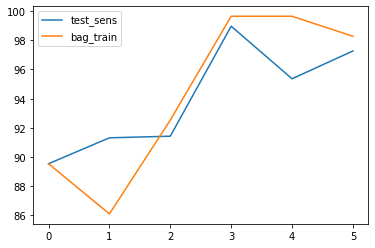

In [ ]:
plt.plot(sens1)

plt.plot(sens3)

plt.legend(['test_sens','bag_train'])

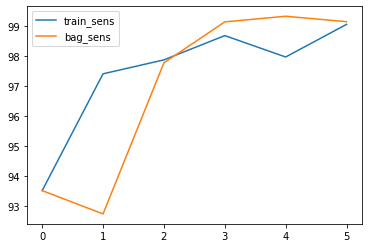

In [ ]:
plt.plot(sens)

plt.plot(sens2)

plt.legend(['train_sens','bag_sens'])

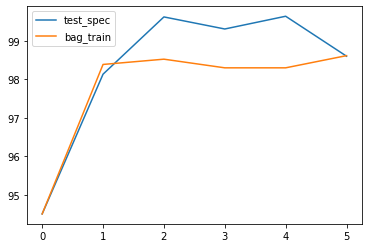

In [ ]:
plt.plot(spec1)
plt.plot(spec3)

plt.legend(['test_spec','bag_train'])

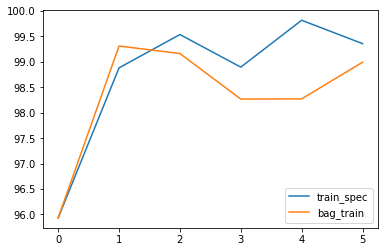

In [ ]:
plt.plot(spec)
plt.plot(spec2)

plt.legend(['train_spec','bag_train'])

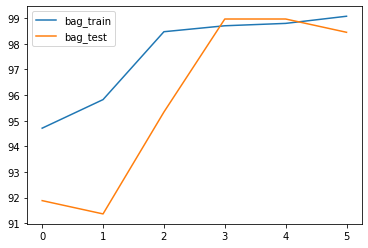

In [ ]:
plt.plot(acc2)

plt.plot(acc3)

plt.legend(['bag_train','bag_test'])

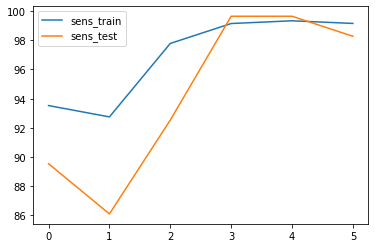

In [ ]:
plt.plot(sens2)

plt.plot(sens3)

plt.legend(['sens_train','sens_test'])

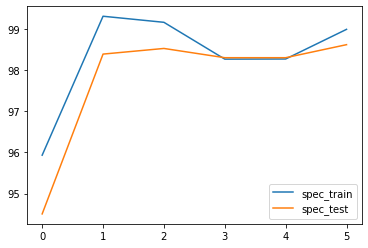

In [ ]:
plt.plot(spec2)

plt.plot(spec3)

plt.legend(['spec_train','spec_test'])

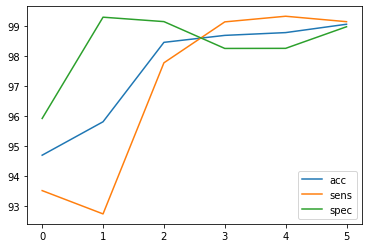

In [ ]:
plt.plot(acc2)
plt.plot(sens2)
plt.plot(spec2)

plt.legend(['acc','sens','spec'])

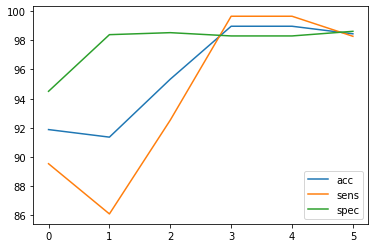

In [ ]:
plt.plot(acc3)
plt.plot(sens3)
plt.plot(spec3)

plt.legend(['acc','sens','spec'])